<a href="https://colab.research.google.com/github/aadbhat/BrainTumorDetectionML/blob/main/BrainTumorDetection_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Environment

In [ ]:
#set runtime type to GPU

API and Dataset retrieval from Kaggle

In [ ]:
! pip install kaggle --upgrade

In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json #hides API

In [ ]:
! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri #api command

 85% 74.0M/86.8M [00:01<00:00, 35.0MB/s]
100% 86.8M/86.8M [00:01<00:00, 56.0MB/s]


In [ ]:
! unzip brain-tumor-classification-mri.zip -d dataset #unzip - the dataset is contained in a zip file

Archive:  brain-tumor-classification-mri.zip
  inflating: dataset/Testing/glioma_tumor/image(1).jpg  
  inflating: dataset/Testing/glioma_tumor/image(10).jpg  
  inflating: dataset/Testing/glioma_tumor/image(100).jpg  
  inflating: dataset/Testing/glioma_tumor/image(11).jpg  
  inflating: dataset/Testing/glioma_tumor/image(12).jpg  
  inflating: dataset/Testing/glioma_tumor/image(13).jpg  
  inflating: dataset/Testing/glioma_tumor/image(14).jpg  
  inflating: dataset/Testing/glioma_tumor/image(15).jpg  
  inflating: dataset/Testing/glioma_tumor/image(16).jpg  
  inflating: dataset/Testing/glioma_tumor/image(17).jpg  
  inflating: dataset/Testing/glioma_tumor/image(18).jpg  
  inflating: dataset/Testing/glioma_tumor/image(19).jpg  
  inflating: dataset/Testing/glioma_tumor/image(2).jpg  
  inflating: dataset/Testing/glioma_tumor/image(20).jpg  
  inflating: dataset/Testing/glioma_tumor/image(21).jpg  
  inflating: dataset/Testing/glioma_tumor/image(22).jpg  
  inflating: dataset/Testing

Testing Commands, playing with git commands

In [ ]:
! ls dataset/

Testing  Training


In [ ]:
! ls dataset/Testing #output - tumor types

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [ ]:
! ls dataset/Testing/glioma_tumor #output - images classified as glioma_tumor

'image(100).jpg'  'image(32).jpg'  'image(55).jpg'  'image(78).jpg'
'image(10).jpg'   'image(33).jpg'  'image(56).jpg'  'image(79).jpg'
'image(11).jpg'   'image(34).jpg'  'image(57).jpg'  'image(7).jpg'
'image(12).jpg'   'image(35).jpg'  'image(58).jpg'  'image(80).jpg'
'image(13).jpg'   'image(36).jpg'  'image(59).jpg'  'image(81).jpg'
'image(14).jpg'   'image(37).jpg'  'image(5).jpg'   'image(82).jpg'
'image(15).jpg'   'image(38).jpg'  'image(60).jpg'  'image(83).jpg'
'image(16).jpg'   'image(39).jpg'  'image(61).jpg'  'image(84).jpg'
'image(17).jpg'   'image(3).jpg'   'image(62).jpg'  'image(85).jpg'
'image(18).jpg'   'image(40).jpg'  'image(63).jpg'  'image(86).jpg'
'image(19).jpg'   'image(41).jpg'  'image(64).jpg'  'image(87).jpg'
'image(1).jpg'	  'image(42).jpg'  'image(65).jpg'  'image(88).jpg'
'image(20).jpg'   'image(43).jpg'  'image(66).jpg'  'image(89).jpg'
'image(21).jpg'   'image(44).jpg'  'image(67).jpg'  'image(8).jpg'
'image(22).jpg'   'image(45).jpg'  'image(68).jpg' 

# Start Working with Images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv
import os
import PIL

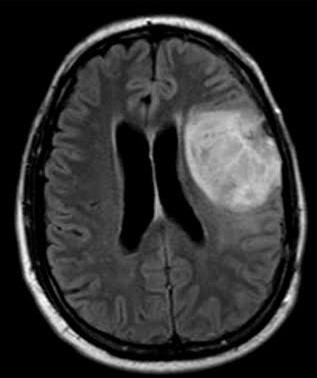

In [ ]:
#Testing to see whether the dataset has been opened and images can be accessed
I_test = np.asarray(PIL.Image.open('dataset/Testing/glioma_tumor/image(89).jpg'))
img_test = PIL.Image.fromarray(np.uint8(I_test))
img_test

In [ ]:
#dimensions of an image/brain scan
I_test.shape

(378, 317, 3)

In [ ]:
#compressing images, defines attributes for keras 
image_size = (150, 150)
img_height = 150
img_width = 150
batch_size = 32
test_batch_size = 8

In [ ]:
#create dataset using keras
import tensorflow as tf
from tensorflow import keras

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/Training/', 
    image_size = image_size, 
    batch_size = batch_size,
    )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/Testing/', 
    image_size = image_size, 
    batch_size = test_batch_size,
    )

img_classes = {
    0: 'Glioma',
    1: 'Meningioma',
    2: 'No tumor',
    3: 'Pituitary tumor'
}

class_type = list(img_classes.values())
num_class = len(class_type)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


# Exploratory Data Analysis

Training Set Analysis

In [ ]:
# Proportion of each class (type of tumor) in dataset
import os 
img_per_type_training = {} #empty dict
for tumor_type in os.listdir('dataset/Training'): #for loop, iterate through every tumor type
  img_per_type_training[tumor_type] = len(os.listdir(f'dataset/Training/{tumor_type}')) #figure out number of images for each type of tumor
print(img_per_type_training)

total_sum_dataset = sum(img_per_type_training.values()) #total number of images in dataset
for key, value in img_per_type_training.items(): #for loop
  img_per_type_training[key] = round(img_per_type_training[key]/total_sum_dataset,3) #number of images of specific tumor/total number of images to determine proportion

print(img_per_type_training) #conclusion: more no_tumors should be added next time


{'pituitary_tumor': 827, 'meningioma_tumor': 822, 'no_tumor': 395, 'glioma_tumor': 826}
{'pituitary_tumor': 0.288, 'meningioma_tumor': 0.286, 'no_tumor': 0.138, 'glioma_tumor': 0.288}


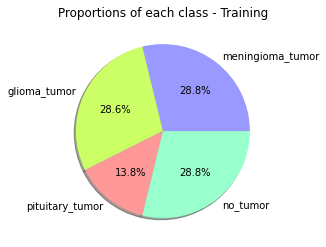

In [ ]:
#pie chart of proportions
plt.title("Proportions of each class - Training")
sizes = img_per_type_training.values()
plt.pie(sizes, labels=('meningioma_tumor','glioma_tumor', 'pituitary_tumor','no_tumor'), 
        autopct='%1.1f%%',
        colors=['#9999ff','#ccff66','#ff9999','#99ffcc'], 
        shadow=True, startangle=0)

plt.show()

Testing Set Analysis

In [ ]:
# Proportion of each class (type of tumor) in dataset
import os 
img_per_type_testing = {} #empty dict
for tumor_type in os.listdir('dataset/Testing'): #for loop, iterate through every tumor type
  img_per_type_testing[tumor_type] = len(os.listdir(f'dataset/Testing/{tumor_type}')) #figure out number of images for each type of tumor
print(img_per_type_testing)

total_sum_dataset = sum(img_per_type_testing.values()) #total number of images in dataset
for key, value in img_per_type_testing.items(): #for loop
  img_per_type_testing[key] = round(img_per_type_testing[key]/total_sum_dataset,3) #number of images of specific tumor/total number of images to determine proportion

print(img_per_type_testing) #conclusion: more pituitary_tumor should be added next time, less meningioma_tumor

{'pituitary_tumor': 74, 'meningioma_tumor': 115, 'no_tumor': 105, 'glioma_tumor': 100}
{'pituitary_tumor': 0.188, 'meningioma_tumor': 0.292, 'no_tumor': 0.266, 'glioma_tumor': 0.254}


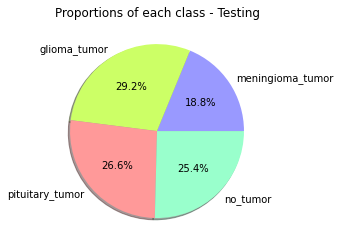

In [ ]:
#pie chart of proportions
plt.title("Proportions of each class - Testing")
sizes = img_per_type_testing.values()
plt.pie(sizes, labels=('meningioma_tumor','glioma_tumor','pituitary_tumor','no_tumor'), 
        autopct='%1.1f%%',
        colors=['#9999ff','#ccff66','#ff9999','#99ffcc'], 
        shadow=True, startangle=0)

plt.show()

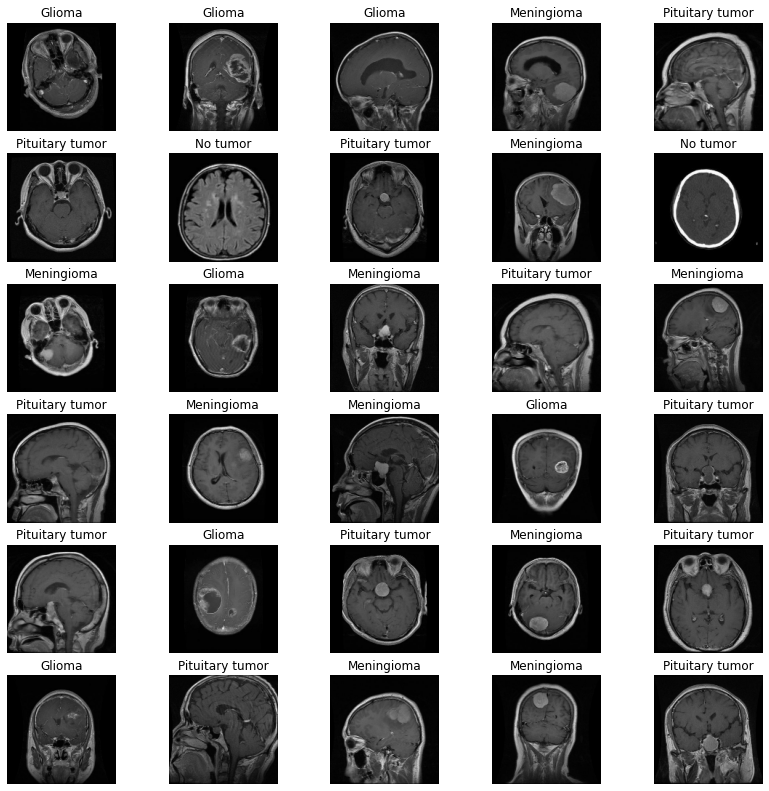

In [ ]:
#random sampling of images
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
for images, labels in train_ds.take(1):
    for i in range(30):
      plt.subplot(6, 5, i + 1)
      plt.imshow(images[i].numpy().astype("uint8")) #uint8 data type contains all whole numbers from 0 to 255.
      plt.title(img_classes[int(labels[i])])
      plt.axis("off")

# Modeling

In [ ]:
#importing libraries needed to create model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

num_classes = 4

#sequential model will use layers to basically take the most important 
#portions of each image and use those sections to classify the image
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', # adam is best optimizer (highest accuracy)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [ ]:
#number of times that dataset passes through all layers 
epochs=10

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/10
90/90 [==============================] - 36s 74ms/step - loss: 0.8718 - accuracy: 0.6331 - val_loss: 1.9005 - val_accuracy: 0.4822
Epoch 2/10
90/90 [==============================] - 7s 70ms/step - loss: 0.4868 - accuracy: 0.8066 - val_loss: 2.1018 - val_accuracy: 0.5228
Epoch 3/10
90/90 [==============================] - 6s 67ms/step - loss: 0.3060 - accuracy: 0.8829 - val_loss: 2.5785 - val_accuracy: 0.6396
Epoch 4/10
90/90 [==============================] - 6s 68ms/step - loss: 0.1735 - accuracy: 0.9397 - val_loss: 3.2400 - val_accuracy: 0.7132
Epoch 5/10
90/90 [==============================] - 6s 65ms/step - loss: 0.1187 - accuracy: 0.9582 - val_loss: 3.3581 - val_accuracy: 0.7259
Epoch 6/10
90/90 [==============================] - 6s 66ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 4.0780 - val_accuracy: 0.7411
Epoch 7/10
90/90 [==============================] - 6s 67ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 4.3814 - val_accuracy: 0.7563
Epoch 8/10
9

In [ ]:
#importing libraries needed to create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

def predicted_vs_true_values(model, test_ds): 
  true_values = [] #list to store the true values
  predicted = [] #list to store the values predicted by the model
  for input, labels in test_ds:
    batch_predictions = model.predict(x=input)
    for prediction in batch_predictions:
      predicted.append(np.argmax(tf.nn.softmax(prediction)))
    for label in labels:
      true_values.append(int(label))
  return true_values, predicted

def get_confusion_df(model, val_ds):
  trues, predicted = predicted_vs_true_values(model, test_ds)
  confusion = confusion_matrix(y_true = trues, y_pred = predicted)
  confusion_df = pd.DataFrame(confusion, index = class_type, columns = class_type)
  
  return confusion_df # returns a dataframe for comparison purposes

In [ ]:
def plot_heatmap(confusion_matrix, name): 
  fig, ax = plt.subplots(figsize=(11, 9))

  sns.heatmap(confusion_matrix, annot = True, cmap="Blues", vmin= 0, vmax=120, 
              square=True, linewidth=0.8, fmt='g', 
              xticklabels=class_type, yticklabels=class_type,
              annot_kws={'fontsize':15})
  ax.xaxis.tick_top()

  plt.xlabel('PREDICTED')
  plt.ylabel('ACTUAL')

  title = f'{name} Performance\n'.upper()
  plt.title(title, loc='left')
  plt.show()

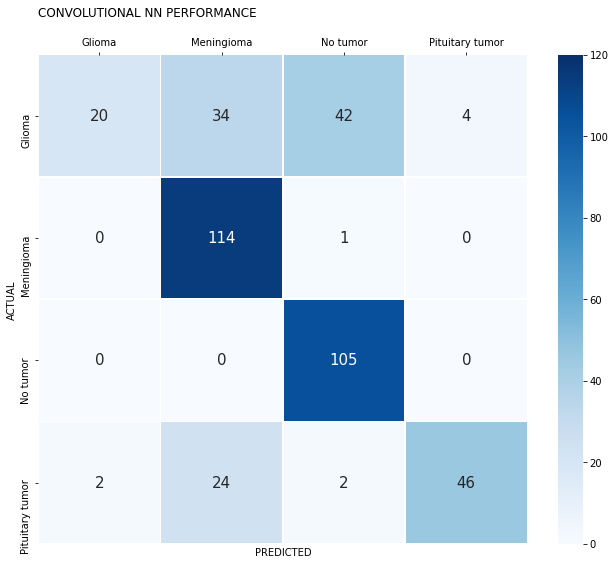

In [ ]:
confusion_heatmap = get_confusion_df(model, test_ds)
plot_heatmap(confusion_heatmap, 'Convolutional NN')